In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load datasets

In [5]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

Inspect the datasets

In [6]:
print("Customers Dataset:")
print(customers.head(), "\n")
print(customers.info())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [7]:
print("Products Dataset:")
print(products.head(), "\n")
print(products.info())



Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [8]:
print("Transactions Dataset:")
print(transactions.head(), "\n")
print(transactions.info())

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         10

Checking for duplicates values

In [9]:
print("Duplicates in Customers dataset:", customers.duplicated().sum())
print("Duplicates in Products dataset:", products.duplicated().sum())
print("Duplicates in Transactions dataset:", transactions.duplicated().sum())

Duplicates in Customers dataset: 0
Duplicates in Products dataset: 0
Duplicates in Transactions dataset: 0


Checking for missing values

In [10]:
print("\n Missing values in Products dataset:")
print(products.isnull().sum())  

print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())

print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())



 Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


Monthly transaction trends

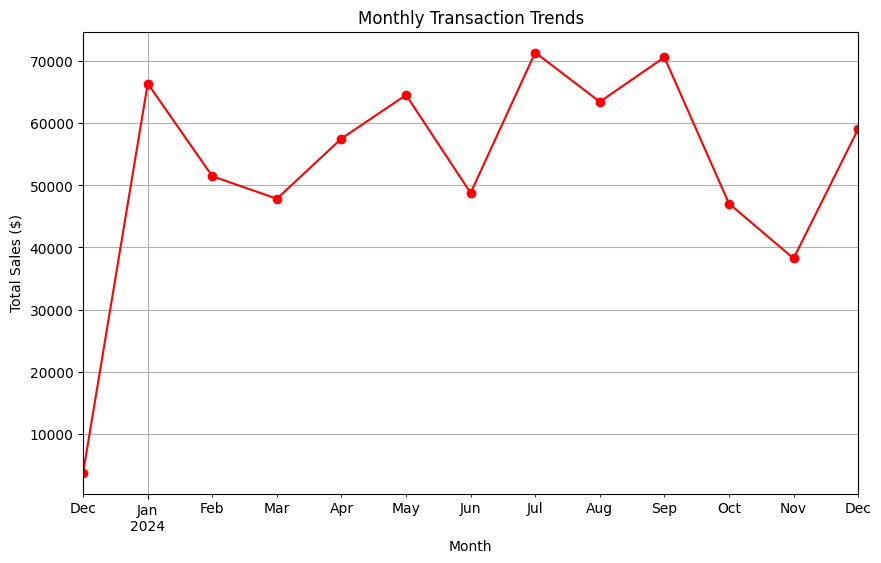

Top 10 Selling Products by Revenue:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


In [18]:

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Create a 'Month' column
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot transaction trends
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6), color='red')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

# Top-selling products
top_products = transactions.groupby('ProductID')['TotalValue'].sum().nlargest(10)
print("Top 10 Selling Products by Revenue:")
print(top_products)


Data merging

In [13]:
#  Merge transactions with products

transactions_products = pd.merge(transactions, products, on='ProductID', how='left')

# Merge with customers Data

full_data = pd.merge(transactions_products, customers, on='CustomerID', how='left')

# Preview the merged data
print(full_data.head())



  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

Show the proportion of each product in the total quantity sold.

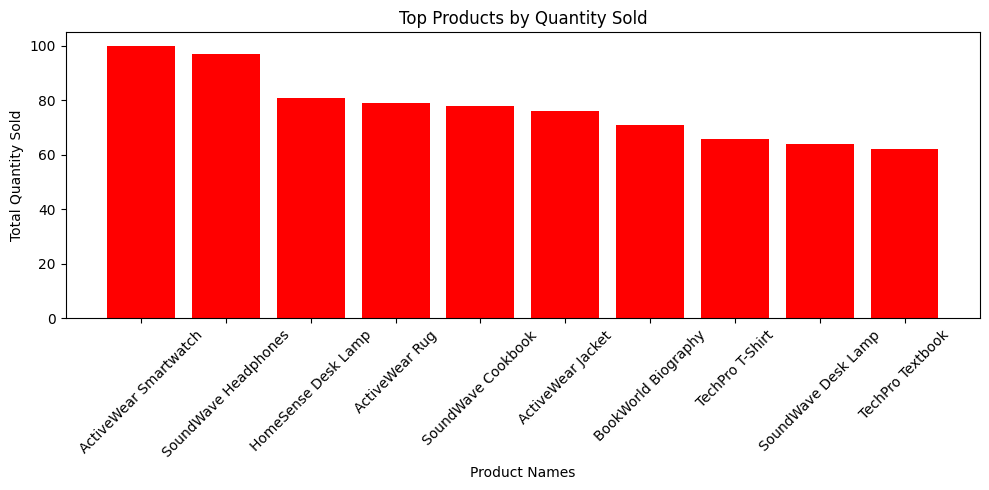

In [14]:
top_products = (
    full_data.groupby("ProductName")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(top_products["ProductName"], top_products["Quantity"], color="red")
plt.title("Top Products by Quantity Sold")
plt.xlabel("Product Names")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Regional Customer Breakdown

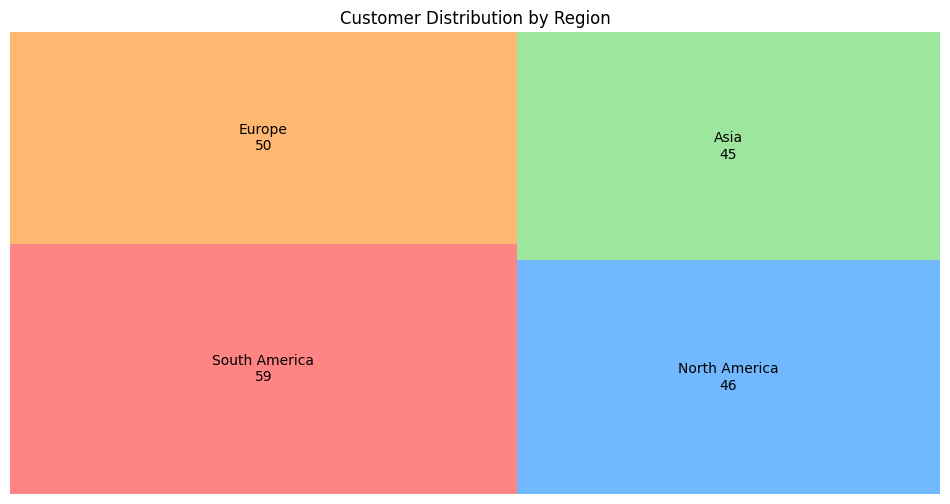

In [ ]:
import squarify
import matplotlib.pyplot as plt

# Sample Data
region_distribution = customers['Region'].value_counts().reset_index()
region_distribution.columns = ['Region', 'Number of Customers']

# Combine region and number of customers for the label
region_distribution['Label'] = region_distribution['Region'] + '\n' + region_distribution['Number of Customers'].astype(str)

# Colors for the treemap
colors = ['#ff6666', '#ffa64d', '#4da6ff', '#85e085']

# Create the treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=region_distribution['Number of Customers'], label=region_distribution['Label'], color=colors, alpha=0.8)
plt.title('Customer Distribution by Region')
plt.axis('off')  # Turn off axis
plt.show()



Regional Revenue Analysis.

Revenue by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


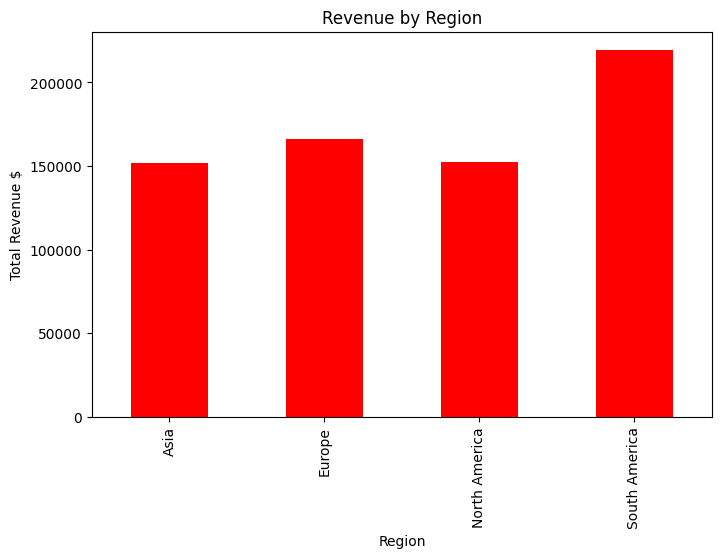

In [ ]:
revenue_by_region = full_data.groupby('Region')['TotalValue'].sum()
print("Revenue by Region:")
print(revenue_by_region)

# Plot revenue by region
revenue_by_region.plot(kind='bar', figsize=(8, 5), color='red')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue $')
plt.show()

Determine Total Sales by Product Category.

C:\Users\HARISH\AppData\Local\Temp\ipykernel_9248\2447716911.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="viridis")


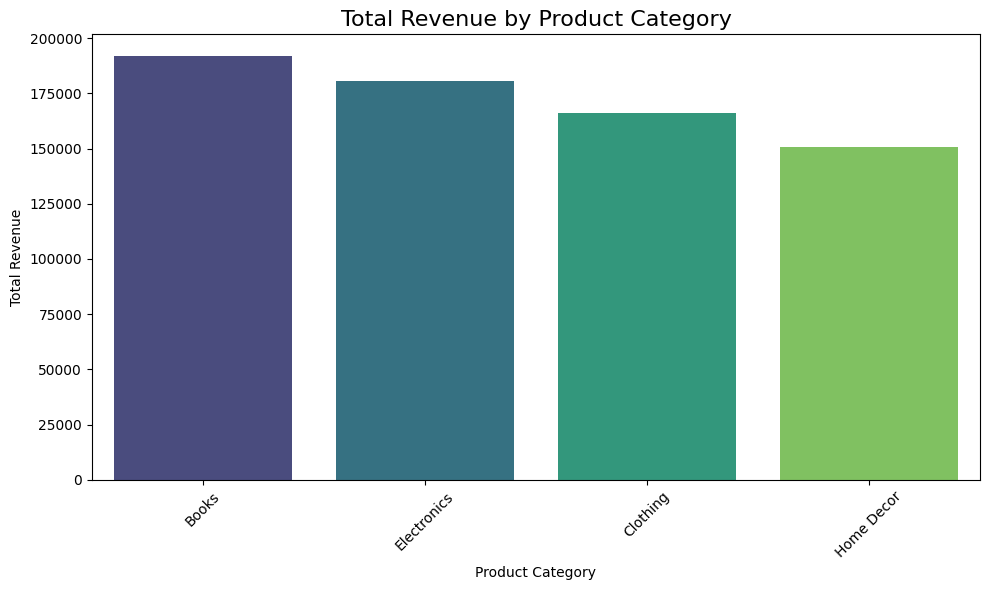

In [ ]:
revenue_by_category = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Visualize

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="viridis")
plt.title("Total Revenue by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=10)
plt.ylabel("Total Revenue", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()